In [1]:
import sys
from pathlib import Path

# add parent folder to the path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)
sys.path, module_path

(['/nfs/projects5/basecalling-jorge/basecalling/notebooks',
  '/home/javila/micromamba/envs/basecalling-cuda117/lib/python310.zip',
  '/home/javila/micromamba/envs/basecalling-cuda117/lib/python3.10',
  '/home/javila/micromamba/envs/basecalling-cuda117/lib/python3.10/lib-dynload',
  '',
  '/home/javila/micromamba/envs/basecalling-cuda117/lib/python3.10/site-packages',
  '/nfs/projects5/basecalling-jorge/basecalling'],
 '/nfs/projects5/basecalling-jorge/basecalling')

___

In [2]:
import h5py
from tqdm import tqdm
from feito.dataloaders import DatasetONT

### Explore `h5py` file

In [3]:
# PATH_DATA="/extdata/RODAN/"
# recfile = Path(PATH_DATA).joinpath("train/rna-train.hdf5")
recfile = Path("../data/RODAN/train/rna-train.hdf5")
h5 = h5py.File(recfile, "r")

### Usage of neural network loader: `DatasetONT`

In [4]:
dataset = DatasetONT(recfile, output_network_len=501)
iter_dataset = iter(dataset)

In [5]:
signal, label, _,  _ = next(iter_dataset)
signal, label

(tensor([[ 0.1527,  0.3054,  0.2991,  ..., -0.9227, -0.9099, -1.0117]]),
 tensor([4, 3, 4, 4, 4, 3, 4, 4, 3, 2, 4, 2, 1, 2, 1, 1, 1, 4, 2, 2, 3, 1, 1, 2,
         1, 1, 2, 1, 3, 3, 4, 2, 4, 2, 2, 4, 1, 3, 1, 2, 4, 2, 2, 3, 1, 2, 2, 1,
         2, 2, 3, 2, 4, 1, 1, 3, 1, 2, 1, 3, 4, 4, 2, 4, 1, 3, 3, 1, 1, 2, 3, 2,
         1, 3, 3, 3, 1, 2, 3, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0]))

In [6]:
import numpy as np
import seaborn as sns

len_seqs = []
iter_dataset = iter(dataset)

In [7]:
len_seqs = [ len(np.trim_zeros(label.numpy())) for signal, label, _, _ in tqdm(iter_dataset, total = dataset.metadata["n_signal"] )]

100%|██████████| 1000002/1000002 [1:24:31<00:00, 197.19it/s]


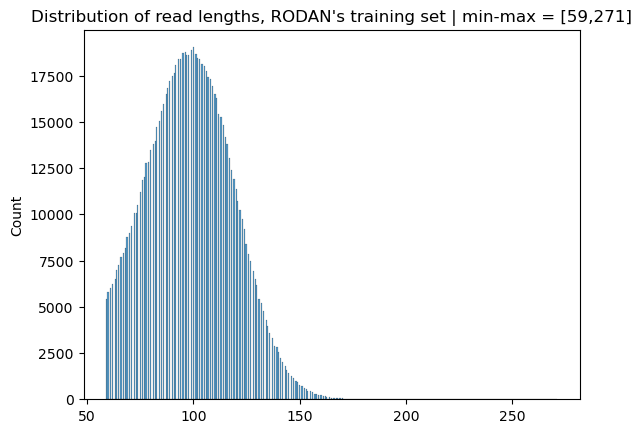

In [8]:
import matplotlib.pyplot as plt
path_save=Path("../output/plots/histplot-lenseqs-train.png")
path_save.parents[0].mkdir(exist_ok=True, parents=True)
hist = sns.histplot(len_seqs)
hist.set(title=f"Distribution of read lengths, RODAN's training set | min-max = [{np.min(len_seqs)},{np.max(len_seqs)}]")
plt.savefig(path_save)